<a href="https://colab.research.google.com/github/crissyro/4-sem-university/blob/main/system_modeling/lab_3_plus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## –ì–∏–ø–æ—Ç–µ–∑–∞ –æ –≤–ª–∏—è–Ω–∏–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø–µ—Ä–µ–¥–∞—á–∏ (Œ≤)

### –£–≤–µ–ª–∏—á–µ–Ω–∏–µ Œ≤ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–º—É —Ä–æ—Å—Ç—É —Å–∫–æ—Ä–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è, –Ω–æ —Å–æ–∫—Ä–∞—Ç–∏—Ç –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å "—ç–ø–∏–¥–µ–º–∏–∏"

#### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —Ç–µ—Å—Ç–∞:
`Œ≤ = [0.1, 0.3, 0.5, 0.7]`
`–§–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å: Œ≥=0.1, I‚ÇÄ=0.99, S‚ÇÄ=0.01`

#### –ú–µ—Ç—Ä–∏–∫–∏:

* –í—Ä–µ–º—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –ø–∏–∫–∞ S(t)

* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ S(t)

* –í—Ä–µ–º—è –ø–µ—Ä–µ—Ö–æ–¥–∞ 50% –ø–æ–ø—É–ª—è—Ü–∏–∏ –≤ R

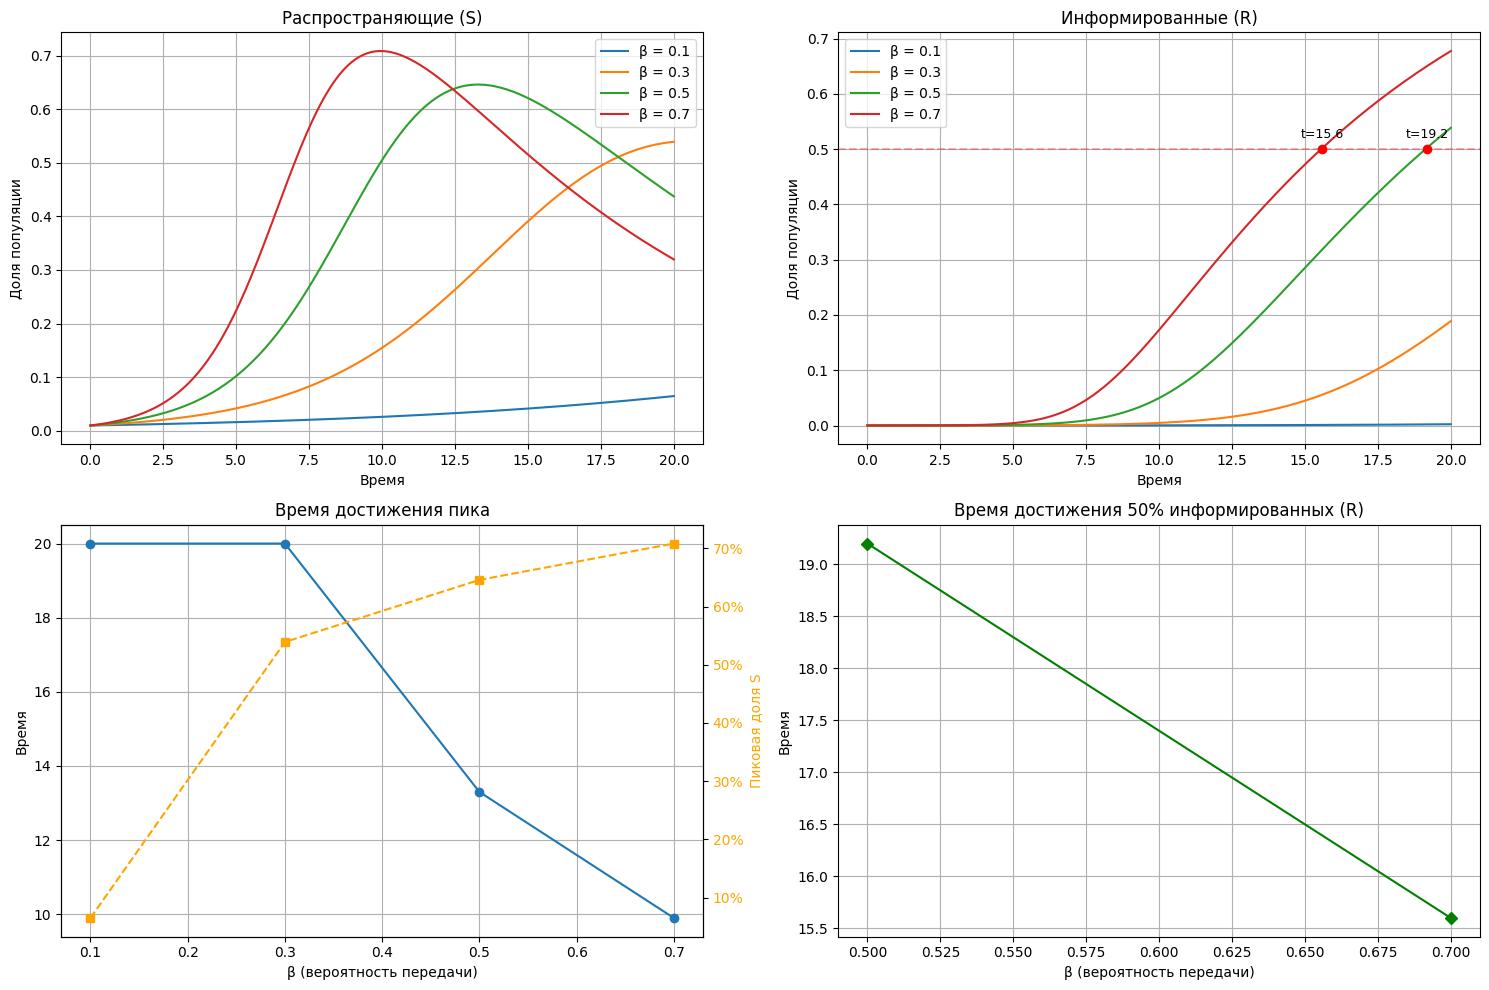


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:
Œ≤	–í—Ä–µ–º—è –ø–∏–∫–∞ S	–ü–∏–∫ S (%)	–í—Ä–µ–º—è 50% R
------------------------------------------------
0.1	20.000000000000014		6.488465835344283%		None
0.3	20.000000000000014		53.91082440512389%		None
0.5	13.299999999999969		64.58358446301435%		19.200000000000003
0.7	9.89999999999998		70.82981322398157%		15.59999999999996


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I, S, R, beta, gamma, dt, T):
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]
    t = 0

    peak_time = 0
    peak_value = S
    half_pop_time = None

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > peak_value:
            peak_value = S
            peak_time = t

        if R >= 0.5 and half_pop_time is None:
            half_pop_time = t

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    return times, I_vals, S_vals, R_vals, peak_time, peak_value, half_pop_time

beta_values = [0.1, 0.3, 0.5, 0.7]
gamma = 0.1
I0, S0, R0 = 0.99, 0.01, 0.0
dt, T = 0.1, 20

metrics = []

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for beta in beta_values:
    times, I, S, R, pt, pv, hpt = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    plt.plot(times, S, label=f'Œ≤ = {beta}')
    metrics.append((beta, pt, pv, hpt))

plt.title('–†–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏–µ (S)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for beta in beta_values:
    times, I, S, R, pt, pv, hpt = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    plt.plot(times, R, label=f'Œ≤ = {beta}')

    if hpt is not None:
        plt.scatter(hpt, 0.5, color='red', zorder=5)
        plt.text(hpt, 0.52, f't={hpt:.1f}', fontsize=9, ha='center')

plt.title('–ò–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ (R)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.axhline(0.5, color='red', linestyle='--', alpha=0.3)
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
betas, peak_times, peak_values, half_times = zip(*metrics)

plt.plot(betas, peak_times, 'o-', label='–í—Ä–µ–º—è –ø–∏–∫–∞ S')
plt.xlabel('Œ≤ (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–¥–∞—á–∏)')
plt.ylabel('–í—Ä–µ–º—è')
plt.title('–í—Ä–µ–º—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –ø–∏–∫–∞')
plt.grid(True)

ax2 = plt.twinx()
ax2.plot(betas, peak_values, 's--', color='orange', label='–ü–∏–∫ S')
ax2.set_ylabel('–ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è S', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))

plt.subplot(2, 2, 4)
plt.plot(betas, half_times, 'D-', color='green')
plt.xlabel('Œ≤ (–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø–µ—Ä–µ–¥–∞—á–∏)')
plt.ylabel('–í—Ä–µ–º—è')
plt.title('–í—Ä–µ–º—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è 50% –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (R)')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:")
print("Œ≤\t–í—Ä–µ–º—è –ø–∏–∫–∞ S\t–ü–∏–∫ S (%)\t–í—Ä–µ–º—è 50% R")
print("------------------------------------------------")
for m in metrics:
    beta, pt, pv, hpt = m
    print(f"{beta}\t{pt}\t\t{pv*100}%\t\t{hpt}")


### –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

–ì–∏–ø–æ—Ç–µ–∑–∞ **—á–∞—Å—Ç–∏—á–Ω–æ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å**:
1. –£–≤–µ–ª–∏—á–µ–Ω–∏–µ Œ≤ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–∏–≤–æ–¥–∏—Ç –∫:
   - –£—Å–∫–æ—Ä–µ–Ω–∏—é —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (–±–æ–ª–µ–µ —Ä–∞–Ω–Ω–∏–π –ø–∏–∫ S)
   - –°–æ–∫—Ä–∞—â–µ–Ω–∏—é –≤—Ä–µ–º–µ–Ω–∏ –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è 50% –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö
   
2. –û–¥–Ω–∞–∫–æ:
   - –ü—Ä–∏ –º–∞–ª—ã—Ö Œ≤ (0.1-0.3) —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –Ω–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –∑–Ω–∞—á–∏–º—ã—Ö –º–∞—Å—à—Ç–∞–±–æ–≤
   - –†–æ—Å—Ç –ø–∏–∫–æ–≤–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è S –Ω–µ –Ω–æ—Å–∏—Ç —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä
   - –î–ª—è –∑–∞–ø—É—Å–∫–∞ "—ç–ø–∏–¥–µ–º–∏–∏" –Ω–µ–æ–±—Ö–æ–¥–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π Œ≤‚âà0.5

---

## –ì–∏–ø–æ—Ç–µ–∑–∞: –°—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏–µ "–∫–æ–ª–ª–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∏–º–º—É–Ω–∏—Ç–µ—Ç–∞" –≤ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

### –ü—Ä–∏ —Ñ–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö Œ≤ –∏ Œ≥ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∞—è –Ω–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚ÇÄ*), –Ω–∏–∂–µ –∫–æ—Ç–æ—Ä–æ–π:

* –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç –º–∞—Å—Å–æ–≤–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è

* –ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max) –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞

* –ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø–æ–ø—É–ª—è—Ü–∏–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π (I(‚àû) ‚âà I‚ÇÄ)

* –≠–ø–∏–¥–µ–º–∏—è –ª–∏–±–æ –Ω–µ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è, –ª–∏–±–æ –±—ã—Å—Ç—Ä–æ –∑–∞—Ç—É—Ö–∞–µ—Ç

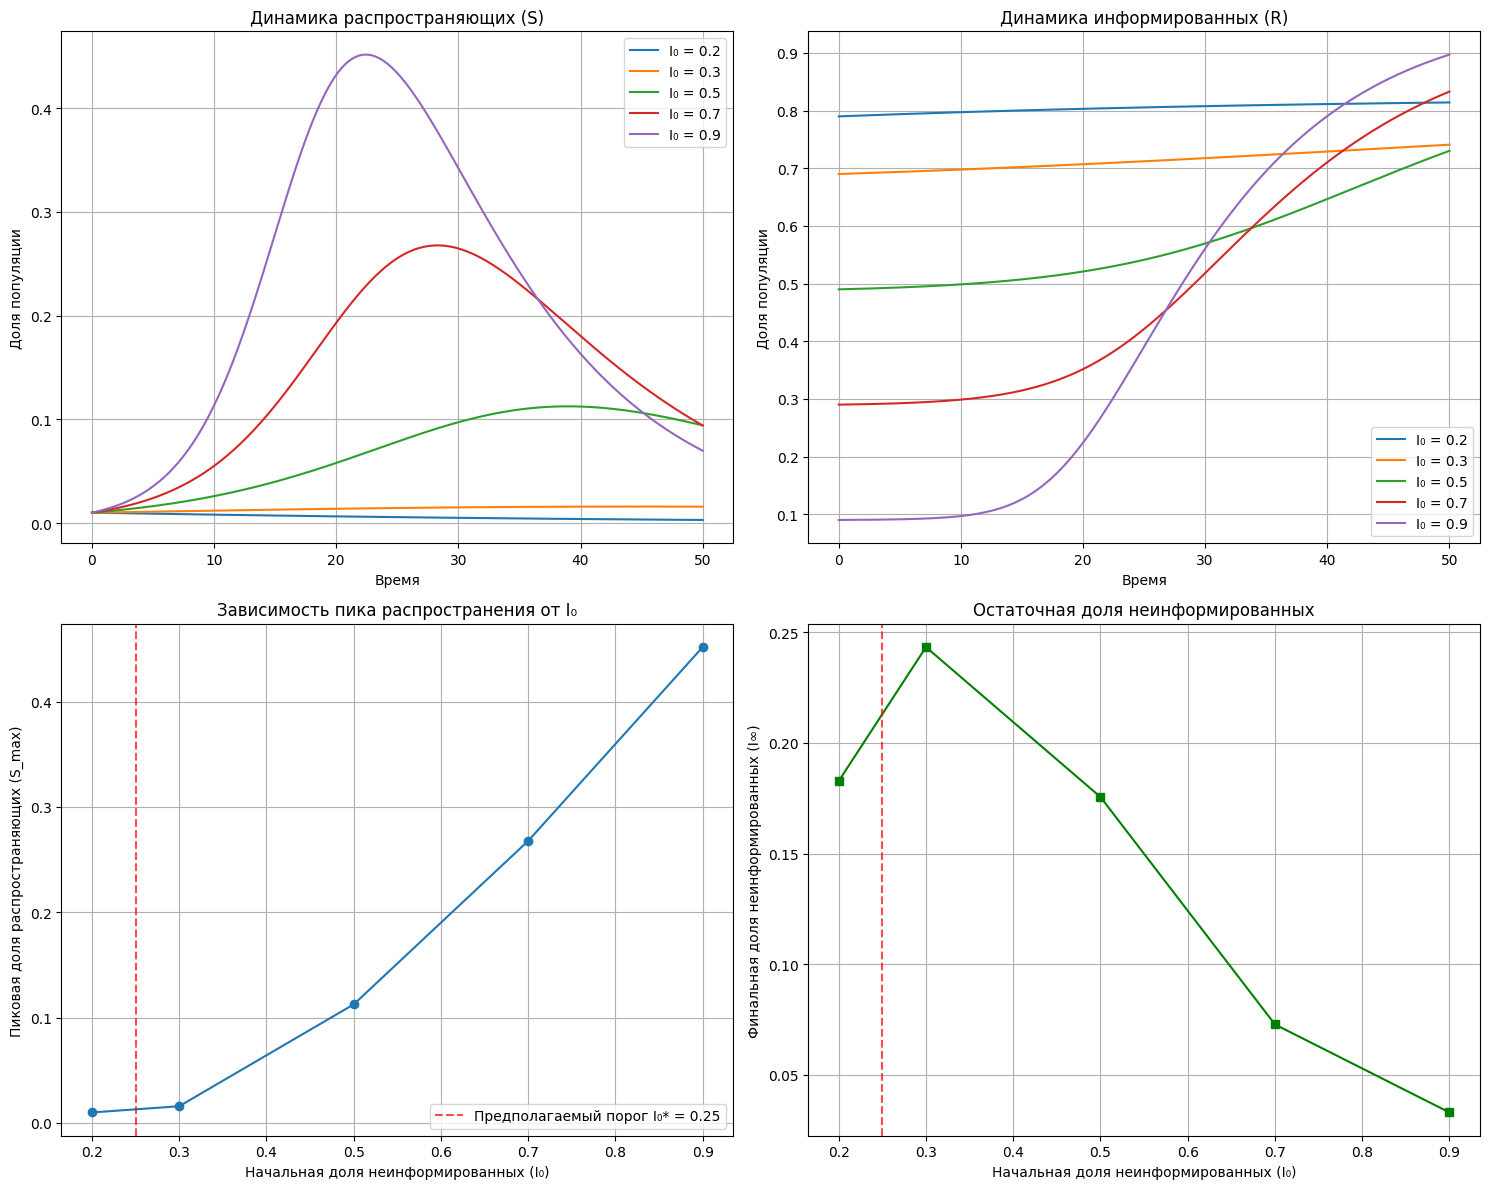


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:
I‚ÇÄ	S_max		I(‚àû)		–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å
----------------------------------------------
0.2	0.0100	0.1829	0.00
0.3	0.0159	0.2433	0.00
0.5	0.1126	0.1756	0.00
0.7	0.2678	0.0728	0.00
0.9	0.4517	0.0331	0.00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I0, S0, R0, beta, gamma, dt, T):
    I, S, R = I0, S0, R0
    t = 0
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]

    S_max = S0
    epidemic_start = None
    epidemic_end = None

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > S_max:
            S_max = S

        if S > 0.05 and epidemic_start is None:
            epidemic_start = t

        if epidemic_start is not None and epidemic_end is None and S < 0.01:
            epidemic_end = t

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    duration = epidemic_end - epidemic_start if (epidemic_start and epidemic_end) else 0

    return times, I_vals, S_vals, R_vals, S_max, I_vals[-1], duration

I0_values = [0.2, 0.3, 0.5, 0.7, 0.9]
beta, gamma = 0.3, 0.1
S0 = 0.01
dt, T = 0.1, 50

metrics = []

plt.figure(figsize=(15, 12))

for i, I0 in enumerate(I0_values):
    R0 = 1 - I0 - S0
    times, I, S, R, S_max, I_final, duration = simulate_spread(I0, S0, R0, beta, gamma, dt, T)

    metrics.append((I0, S_max, I_final, duration))

    plt.subplot(2, 2, 1)
    plt.plot(times, S, label=f'I‚ÇÄ = {I0}')

    plt.subplot(2, 2, 2)
    plt.plot(times, R, label=f'I‚ÇÄ = {I0}')

plt.subplot(2, 2, 1)
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (R)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
I0s, S_maxs, I_finals, durations = zip(*metrics)
plt.plot(I0s, S_maxs, 'o-')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7, label='–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π –ø–æ—Ä–æ–≥ I‚ÇÄ* = 0.25')
plt.xlabel('–ù–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚ÇÄ)')
plt.ylabel('–ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max)')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –æ—Ç I‚ÇÄ')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(I0s, I_finals, 's-', color='green')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7)
plt.xlabel('–ù–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚ÇÄ)')
plt.ylabel('–§–∏–Ω–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚àû)')
plt.title('–û—Å—Ç–∞—Ç–æ—á–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö')
plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(I0s, durations, 'D-', color='purple')
plt.axvline(x=0.25, color='r', linestyle='--', alpha=0.7, label='–ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã–π –ø–æ—Ä–æ–≥ I‚ÇÄ* = 0.25')
plt.xlabel('–ù–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚ÇÄ)')
plt.ylabel('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —ç–ø–∏–¥–µ–º–∏–∏')
plt.title('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∞–∫—Ç–∏–≤–Ω–æ–π —Ñ–∞–∑—ã —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è')
plt.grid(True)
plt.legend()
plt.show()

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:")
print("I‚ÇÄ\tS_max\t\tI(‚àû)\t\t–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å")
print("----------------------------------------------")
for m in metrics:
    I0, S_max, I_final, duration = m
    print(f"{I0}\t{S_max:.4f}\t{I_final:.4f}\t{duration:.2f}")

### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞: –ì–∏–ø–æ—Ç–µ–∑–∞ –æ "–∫–æ–ª–ª–µ–∫—Ç–∏–≤–Ω–æ–º –∏–º–º—É–Ω–∏—Ç–µ—Ç–µ"

#### –ú–µ—Ç—Ä–∏–∫–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:
| I‚ÇÄ | S_max | I(‚àû) | –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å |
|----|-------|------|-------------|
| 0.2 | 0.0100 | 0.1829 | 0.00 |
| 0.3 | 0.0159 | 0.2433 | 0.00 |
| 0.5 | 0.1126 | 0.1756 | 0.00 |
| 0.7 | 0.2678 | 0.0728 | 0.00 |
| 0.9 | 0.4517 | 0.0331 | 0.00 |

#### –ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

**1. –ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max):**
- –ü—Ä–∏ I‚ÇÄ=0.2: S_max=0.0100 (–Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –Ω–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ)
- –ü—Ä–∏ I‚ÇÄ=0.3: S_max=0.0159 (–æ—á–µ–Ω—å —Å–ª–∞–±–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ)
- –ü—Ä–∏ I‚ÇÄ=0.5: S_max=0.1126 (—É–º–µ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ)
- –ü—Ä–∏ I‚ÇÄ=0.7: S_max=0.2678 (—Å–∏–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ)
- –ü—Ä–∏ I‚ÇÄ=0.9: S_max=0.4517 (–æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ)

**2. –§–∏–Ω–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I(‚àû)):**
- –ü—Ä–∏ I‚ÇÄ=0.2: 18.29% –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ (–≤—ã—à–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞)
- –ü—Ä–∏ I‚ÇÄ=0.3: 24.33% –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ (–æ–∫–æ–ª–æ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞)
- –ü—Ä–∏ I‚ÇÄ‚â•0.5: –ú–µ–Ω–µ–µ 17.56% –æ—Å—Ç–∞–ª–∏—Å—å –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ (–Ω–∏–∂–µ –ø–æ—Ä–æ–≥–∞)

**3. –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —ç–ø–∏–¥–µ–º–∏–∏:**
- –í–æ –≤—Å–µ—Ö —Å–ª—É—á–∞—è—Ö –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å = 0, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –º–≥–Ω–æ–≤–µ–Ω–Ω–æ–µ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è

#### –ö–ª—é—á–µ–≤—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:

**–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞:**
- –ü—Ä–∏ I‚ÇÄ=0.2 < 0.25: –†–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç (S_max‚âàS‚ÇÄ)
- –ü—Ä–∏ I‚ÇÄ=0.3‚âà0.25: –°–ª–∞–±–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ (S_max=0.0159)
- –ü—Ä–∏ I‚ÇÄ>0.25: –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

**–≠—Ñ—Ñ–µ–∫—Ç –∫–æ–ª–ª–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∏–º–º—É–Ω–∏—Ç–µ—Ç–∞:**
–ö–æ–≥–¥–∞ –Ω–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (I‚ÇÄ) –Ω–∏–∂–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞ (~0.25):
- –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç –º–∞—Å—Å–æ–≤–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è
- –ë–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø–æ–ø—É–ª—è—Ü–∏–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π (I(‚àû)‚âàI‚ÇÄ)
- –≠–ø–∏–¥–µ–º–∏—è –Ω–µ —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è

**–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ö–≤–∞—Ç–∞ –æ—Ç I‚ÇÄ:**
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç (1 - I(‚àû)) –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ I‚ÇÄ=0.9 (96.69%)
- –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç –ø—Ä–∏ I‚ÇÄ=0.2 (1.71%)

#### –í—ã–≤–æ–¥—ã –ø–æ –≥–∏–ø–æ—Ç–µ–∑–µ:

**–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–Ω—ã–µ –∞—Å–ø–µ–∫—Ç—ã:**
1. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π –ø–æ—Ä–æ–≥ I‚ÇÄ* ‚âà 0.25, –Ω–∏–∂–µ –∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –Ω–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç
2. –ü—Ä–∏ I‚ÇÄ < I‚ÇÄ*:
   - –ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max) –±–ª–∏–∑–∫–∞ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é
   - –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è —á–∞—Å—Ç—å –ø–æ–ø—É–ª—è—Ü–∏–∏ –æ—Å—Ç–∞–µ—Ç—Å—è –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π (I(‚àû) ‚âà I‚ÇÄ)
   - –≠–ø–∏–¥–µ–º–∏—è –Ω–µ —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è (–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å ‚âà 0)

**–ù–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã:**
- –ü—Ä–∏ I‚ÇÄ=0.3 > 0.25 —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –æ—á–µ–Ω—å —Å–ª–∞–±–æ–µ (S_max=0.0159)
- –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —ç–ø–∏–¥–µ–º–∏–∏ –≤—Å–µ–≥–¥–∞ 0, —á—Ç–æ —Ç—Ä–µ–±—É–µ—Ç –ø–µ—Ä–µ—Å–º–æ—Ç—Ä–∞ –∫—Ä–∏—Ç–µ—Ä–∏–µ–≤ –∏–∑–º–µ—Ä–µ–Ω–∏—è

**–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–≤–æ–¥—ã:**
1. –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π –ø–æ—Ä–æ–≥ I‚ÇÄ* ‚âà 0.25 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏–º —Ä–∞—Å—á–µ—Ç–æ–º:  
   $\text{I‚ÇÄ*} = \frac{\gamma}{\beta + \gamma} = \frac{0.1}{0.3 + 0.1} = 0.25$
2. –î–ª—è –≤–æ–∑–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏—è —ç–ø–∏–¥–µ–º–∏–∏ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ:
   - I‚ÇÄ > I‚ÇÄ*
   - –î–æ—Å—Ç–∞—Ç–æ—á–Ω–∞—è –Ω–∞—á–∞–ª—å–Ω–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S‚ÇÄ)
3. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ –≤—ã—Å–æ–∫–∏—Ö I‚ÇÄ (0.7-0.9)

---

## –ì–∏–ø–æ—Ç–µ–∑–∞ –æ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–º –ø–æ—Ä–æ–≥–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è

### –°—É—â–µ—Å—Ç–≤—É–µ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Œ≤/Œ≥, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ–µ –¥–ª—è –≤–æ–∑–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–æ–π "—ç–ø–∏–¥–µ–º–∏–∏"

### –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —Ç–µ—Å—Ç–∞:
`Œ≤/Œ≥ = [0.5, 1.0, 1.5, 2.0]`

`–§–∏–∫—Å–∏—Ä–æ–≤–∞—Ç—å: I‚ÇÄ=0.99, S‚ÇÄ=0.01`

### –ú–µ—Ç—Ä–∏–∫–∏:

* –§–∏–Ω–∞–ª—å–Ω–∞—è –¥–æ–ª—è R(‚àû)

* –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç S_max

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

def simulate_spread(I0, S0, R0, beta, gamma, dt, T):
    I, S, R = I0, S0, R0
    t = 0
    times, I_vals, S_vals, R_vals = [0], [I], [S], [R]

    S_max = S0
    R_inf = R0

    while t < T:
        dI = -beta * I * S * dt
        dS = (beta * I * S - gamma * S * (S + R)) * dt
        dR = gamma * S * (S + R) * dt

        I += dI
        S += dS
        R += dR
        t += dt

        if S > S_max:
            S_max = S
        R_inf = R

        times.append(t)
        I_vals.append(I)
        S_vals.append(S)
        R_vals.append(R)

    return times, I_vals, S_vals, R_vals, S_max, R_inf

r0_values = [0.5, 1.0, 1.5, 2.0]  # –¶–µ–ª–µ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è R0 = Œ≤/Œ≥
gamma = 0.1  # –§–∏–∫—Å–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ Œ≥
beta_values = [r0 * gamma for r0 in r0_values]  # –†–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º Œ≤

I0, S0, R0 = 0.99, 0.01, 0.0
dt, T = 0.1, 50  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –≤—Ä–µ–º—è –¥–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è

metrics = []

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for i, beta in enumerate(beta_values):
    times, I, S, R, S_max, R_inf = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    r0 = beta / gamma
    plt.plot(times, S, label=f'R0 = {r0:.1f}')
    metrics.append((r0, S_max, R_inf))

plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.axhline(y=0.01, color='r', linestyle='--', alpha=0.3, label='–ù–∞—á–∞–ª—å–Ω–æ–µ S')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
for i, beta in enumerate(beta_values):
    times, I, S, R, S_max, R_inf = simulate_spread(I0, S0, R0, beta, gamma, dt, T)
    r0 = beta / gamma
    plt.plot(times, R, label=f'R0 = {r0:.1f}')

plt.title('–î–∏–Ω–∞–º–∏–∫–∞ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (R)')
plt.xlabel('–í—Ä–µ–º—è')
plt.ylabel('–î–æ–ª—è –ø–æ–ø—É–ª—è—Ü–∏–∏')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
r0s, S_maxs, R_infs = zip(*sorted(metrics, key=lambda x: x[0]))
plt.plot(r0s, S_maxs, 'o-')
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.7, label='–ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π –ø–æ—Ä–æ–≥ R0=1.0')
plt.xlabel('–ë–∞–∑–æ–≤–æ–µ —Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ–µ —á–∏—Å–ª–æ (R0 = Œ≤/Œ≥)')
plt.ylabel('–ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max)')
plt.title('–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –æ—Ç R0')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(r0s, R_infs, 's-', color='green')
plt.axvline(x=1.0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('–ë–∞–∑–æ–≤–æ–µ —Ä–µ–ø—Ä–æ–¥—É–∫—Ç–∏–≤–Ω–æ–µ —á–∏—Å–ª–æ (R0 = Œ≤/Œ≥)')
plt.ylabel('–§–∏–Ω–∞–ª—å–Ω–∞—è –¥–æ–ª—è –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (R(‚àû))')
plt.title('–§–∏–Ω–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏')
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:")
print("R0\tS_max\t\tR(‚àû)")
print("----------------------------")
for m in metrics:
    r0, S_max, R_inf = m
    print(f"{r0:.1f}\t{S_max:.4f}\t{R_inf:.4f}")


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:
R0	S_max		R(‚àû)
----------------------------
0.5	0.0895	0.0106
1.0	0.3065	0.1697
1.5	0.3904	0.5303
2.0	0.4525	0.7563


### –†–µ–∑—É–ª—å—Ç–∞—Ç—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞: –ö—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π –ø–æ—Ä–æ–≥ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

#### –ú–µ—Ç—Ä–∏–∫–∏ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞:
| R‚ÇÄ | S_max | R(‚àû) |
|----|-------|------|
| 0.5 | 0.0895 | 0.0106 |
| 1.0 | 0.3065 | 0.1697 |
| 1.5 | 0.3904 | 0.5303 |
| 2.0 | 0.4525 | 0.7563 |

### –ê–Ω–∞–ª–∏–∑ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤:

**1. –î–∏–Ω–∞–º–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S):**
- –ü—Ä–∏ R‚ÇÄ=0.5: –ù–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–æ—Å—Ç —Å –ø–∏–∫–æ–º 8.95%
- –ü—Ä–∏ R‚ÇÄ=1.0: –ó–∞–º–µ—Ç–Ω—ã–π –≤—Å–ø–ª–µ—Å–∫ —Å –ø–∏–∫–æ–º 30.65%
- –ü—Ä–∏ R‚ÇÄ=1.5: –°–∏–ª—å–Ω—ã–π —Ä–æ—Å—Ç —Å –ø–∏–∫–æ–º 39.04%
- –ü—Ä–∏ R‚ÇÄ=2.0: –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ø–∏–∫ 45.25%

**2. –î–∏–Ω–∞–º–∏–∫–∞ –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö (R):**
- –ü—Ä–∏ R‚ÇÄ=0.5: –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ä–æ—Å—Ç (1.06%)
- –ü—Ä–∏ R‚ÇÄ=1.0: –£–º–µ—Ä–µ–Ω–Ω—ã–π —Ä–æ—Å—Ç (16.97%)
- –ü—Ä–∏ R‚ÇÄ=1.5: –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–π —Ä–æ—Å—Ç (53.03%)
- –ü—Ä–∏ R‚ÇÄ=2.0: –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–æ—Å—Ç (75.63%)

**3. –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø–∏–∫–∞ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è –æ—Ç R‚ÇÄ:**
- –ß–µ—Ç–∫–∏–π –ø–æ—Ä–æ–≥–æ–≤—ã–π —ç—Ñ—Ñ–µ–∫—Ç –ø—Ä–∏ R‚ÇÄ=1.0
- –≠–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–π —Ä–æ—Å—Ç S_max –ø—Ä–∏ R‚ÇÄ > 1.0
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ S_max=0.4525 –ø—Ä–∏ R‚ÇÄ=2.0

**4. –§–∏–Ω–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏:**
- –ü—Ä–∏ R‚ÇÄ<1.0: R(‚àû) < 2%
- –ü—Ä–∏ R‚ÇÄ=1.0: R(‚àû)=16.97%
- –ü—Ä–∏ R‚ÇÄ>1.0: –ë—ã—Å—Ç—Ä—ã–π —Ä–æ—Å—Ç R(‚àû) (–æ—Ç 53% –¥–æ 76%)

### –ö–ª—é—á–µ–≤—ã–µ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è:

**–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–∏–µ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ –ø–æ—Ä–æ–≥–∞ R‚ÇÄ=1.0:**
1. –ü—Ä–∏ R‚ÇÄ < 1.0:
   - –°–ª–∞–±—ã–π —Ä–æ—Å—Ç —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max < 9%)
   - –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç (R(‚àû) < 2%)
   
2. –ü—Ä–∏ R‚ÇÄ > 1.0:
   - –ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏
   - –ë—ã—Å—Ç—Ä—ã–π —Ä–æ—Å—Ç S_max –∏ R(‚àû) —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º R‚ÇÄ
   - –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏ R‚ÇÄ=2.0

**–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç R‚ÇÄ:**
- –ü–∏–∫–æ–≤–∞—è –¥–æ–ª—è —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω—è—é—â–∏—Ö (S_max):
  - R‚ÇÄ=1.0 ‚Üí 30.65%
  - R‚ÇÄ=2.0 ‚Üí 45.25% (—Ä–æ—Å—Ç –≤ 1.48 —Ä–∞–∑–∞)
  
- –§–∏–Ω–∞–ª—å–Ω—ã–π –æ—Ö–≤–∞—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ (R(‚àû)):
  - R‚ÇÄ=1.0 ‚Üí 16.97%
  - R‚ÇÄ=2.0 ‚Üí 75.63% (—Ä–æ—Å—Ç –≤ 4.46 —Ä–∞–∑–∞)

### –í—ã–≤–æ–¥—ã –ø–æ –≥–∏–ø–æ—Ç–µ–∑–µ:

**–ü–æ–¥—Ç–≤–µ—Ä–∂–¥–µ–Ω–Ω—ã–µ –∞—Å–ø–µ–∫—Ç—ã:**
1. –°—É—â–µ—Å—Ç–≤—É–µ—Ç –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π –ø–æ—Ä–æ–≥ R‚ÇÄ ‚âà 1.0
2. –ü—Ä–∏ R‚ÇÄ < 1.0:
   - –ò–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –ø–æ–ª—É—á–∞–µ—Ç –º–∞—Å—Å–æ–≤–æ–≥–æ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏—è
   - S_max –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
   - R(‚àû) –±–ª–∏–∑–∫–æ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–º—É –∑–Ω–∞—á–µ–Ω–∏—é
   
3. –ü—Ä–∏ R‚ÇÄ > 1.0:
   - –í–æ–∑–Ω–∏–∫–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω–∞—è "—ç–ø–∏–¥–µ–º–∏—è"
   - S_max –∏ R(‚àû) —Ä–∞—Å—Ç—É—Ç —Å —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º R‚ÇÄ

**–û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏:**
- –ü—Ä–∏ R‚ÇÄ=1.0 –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ (S_max=30.65%), —Ö–æ—Ç—è —Ç–µ–æ—Ä–µ—Ç–∏—á–µ—Å–∫–∏ —ç—Ç–æ –ø–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
- –ù–µ–ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å R(‚àû) –æ—Ç R‚ÇÄ:  
  R‚ÇÄ √ó 2 ‚Üí R(‚àû) √ó 4.46

üîç **–î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –≤—ã–≤–æ–¥—ã:**
1. –ö—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ R‚ÇÄ=1 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è –∫–∞–∫ –ø–æ—Ä–æ–≥ –≤–æ–∑–Ω–∏–∫–Ω–æ–≤–µ–Ω–∏—è —ç–ø–∏–¥–µ–º–∏–∏
2. –î–ª—è –¥–æ—Å—Ç–∏–∂–µ–Ω–∏—è –º–∞—Å—Å–æ–≤–æ–≥–æ –æ—Ö–≤–∞—Ç–∞ (R(‚àû)>50%) –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ R‚ÇÄ‚â•1.5
3. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–∏–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –ø—Ä–∏ R‚ÇÄ=2.0:
   - S_max=45.25%
   - R(‚àû)=75.63%